# Car Price Prediction using Linear Regression 🚗💰

## Overview
This project builds a **linear regression model** to predict car prices based on various features like mileage, brand, year, and engine type. 

This notebook was created as part of my learning journey in **data science & machine learning** through the Udemy course *[The Data Science Course: Complete Data Science Bootcamp 2025]*. I have added custom improvements and additional insights.

# The Journey  :)

1. Understanding the problem and defining a goal
2. Preprocessing the data (Cleaning the data)
3. Checking OLS assumptions
4. Including categorical data (Creating dummy variables)
5. Creating the linear regression model

#### 1 - Understanding the Problem and Defining a Goal  
Before building a model, it’s essential to understand:  
- **What are we predicting?** → Car prices based on key features.  
- **Why is this useful?** → Helps buyers, sellers, and dealers estimate car values.  
- **Which features impact price?** → Year, brand, mileage, fuel type, transmission, etc.  

The **goal** is to develop a **linear regression model** that accurately predicts car prices based on available data.  

In [232]:
# Import libraries
import numpy as np  # Math and arrays
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt # Graphs
import seaborn as sns # Make Graphs pretty :)
sns.set()

from sklearn.linear_model import LinearRegression # Model training

#### 2. Preprocessing the Data (Cleaning the Data)  
Raw data often contains missing values, duplicates, and inconsistencies. 
The preprocessing steps include:  

- **Handling missing values** → Removing rows or imputing missing data.  
- **Removing duplicates** → Ensuring data integrity.  
- **Filtering out outliers** → Identifying extreme values that could skew predictions.  
- **Scaling numerical features** → Applying normalization or standardization for better model performance.  
- **Verifying Data** → Ensuring data entries make sense.  

In [233]:
# Import the csv
raw_data = pd.read_csv('cars.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


In [234]:
# Show stats 
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.00,4345.00,4195.00,4345.00
mean,19418.75,161.24,2.79,2006.55
std,25584.24,105.71,5.07,6.72
min,600.00,0.00,0.60,1969.00
25%,6999.00,86.00,1.80,2003.00
50%,11500.00,155.00,2.20,2008.00
75%,21700.00,230.00,3.00,2012.00
max,300000.00,980.00,99.99,2016.00


In [235]:
# Show stats including categorical ones
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


In [236]:
# Model has too many unique values and will be a headache so i'm removing. :/
data = raw_data.drop(['Model'], axis = 1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


In [237]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [238]:
# checking how many values are missing
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [239]:
# if the missing is less than 5% it is safe to drop the whole row
# removing the entire row that has a missing value
data_no_null = data.dropna(axis = 0)

In [240]:
data_no_null.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00


In [241]:
data_no_null.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

#### Exploring the PDFs (probability distribution function)

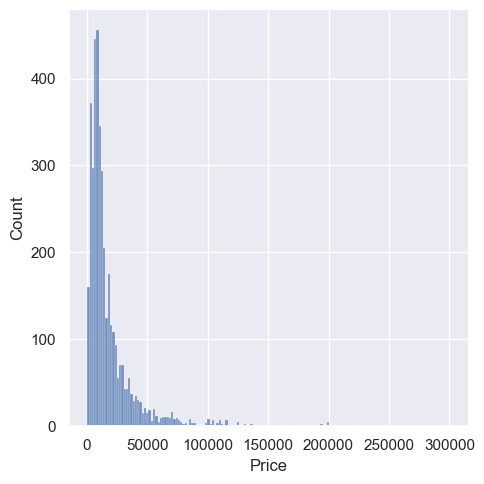

In [242]:
# check how price is being distributed 
sns.displot(data_no_null['Price'])

In [243]:
# Removing 1% outlier
# check where the outliers lie if on the right we use 0.99. If on the left take 0.01
outliers_price = data_no_null['Price'].quantile(0.99)

In [244]:
# check where the outliers lie if on the right, take everything less than the outlier value. 
# If on the left, take everything greater than the outlier value.
data1 =  data_no_null[ data_no_null['Price']<outliers_price]

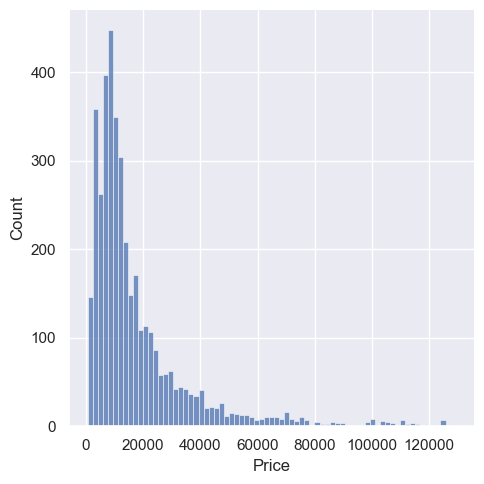

In [245]:
sns.displot(data1['Price'])

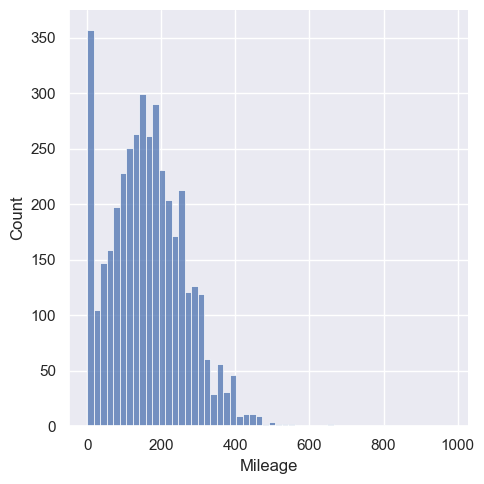

In [246]:
sns.displot(data_no_null['Mileage'])

In [247]:
outliers_milage = data1['Mileage'].quantile(0.99)

In [248]:
data2 = data1[ data1['Mileage'] < outliers_milage]

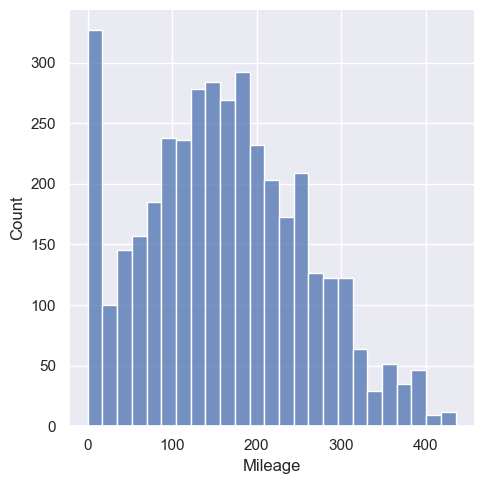

In [249]:
sns.displot(data2['Mileage'])

In [250]:
data2.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.00,3944,3944.00,3944.00,3944,3944,3944.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.88,NaN,161.48,2.75,NaN,NaN,2006.39
std,NaN,19008.21,NaN,96.03,4.98,NaN,NaN,6.60
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,7000.00,NaN,92.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21376.25,NaN,230.00,3.00,NaN,NaN,2011.00


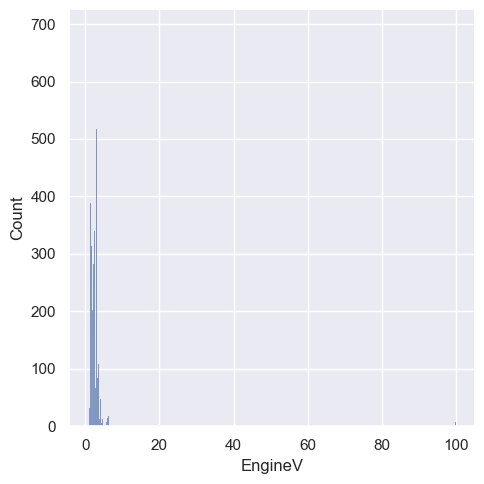

In [251]:
sns.displot(data_no_null['EngineV'])

In [252]:
data3 = data2[data2['EngineV']<6.5]

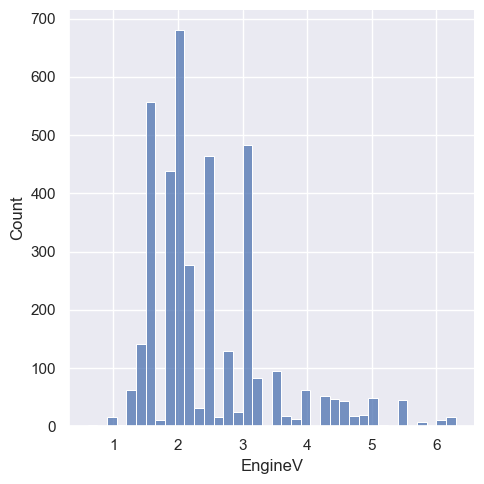

In [253]:
sns.displot(data3['EngineV'])

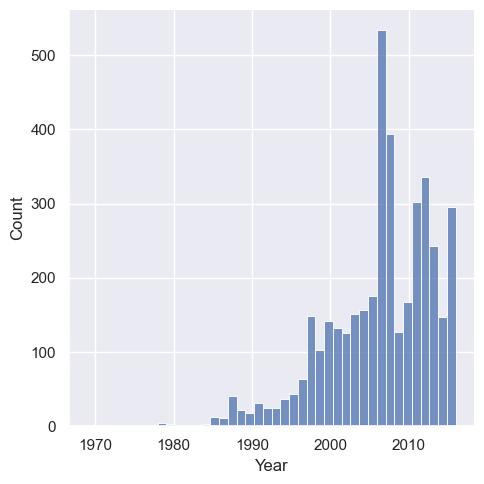

In [254]:
sns.displot(data_no_null['Year'])

In [255]:
outliers_year = data3['Year'].quantile(0.01)
data4 = data3[data3['Year']>outliers_year]

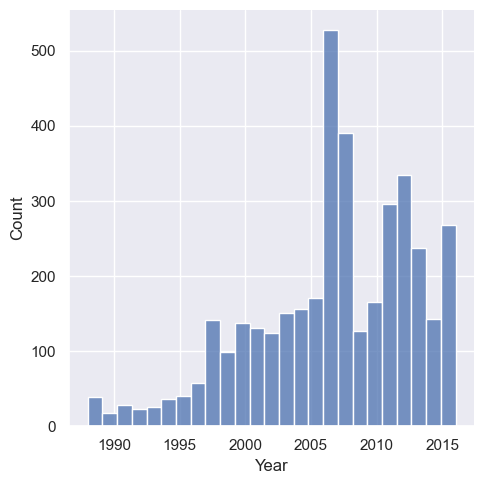

In [256]:
sns.displot(data4['Year'])

In [257]:
# Removing original indices (Problem if we forget this step)
# Once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data4.reset_index(drop = True)

In [258]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999


In [259]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


####  Checking OLS Assumptions  
For **Ordinary Least Squares (OLS) Regression** to work correctly, certain assumptions must be met:  
- **Linearity** → The relationship between independent and dependent variables should be linear.  
- **Homoscedasticity** → The variance of residuals should be constant.  
- **No multicollinearity** → Independent variables should not be highly correlated.  
- **Normality of residuals** → The error terms should follow a normal distribution.  


#### Linearity

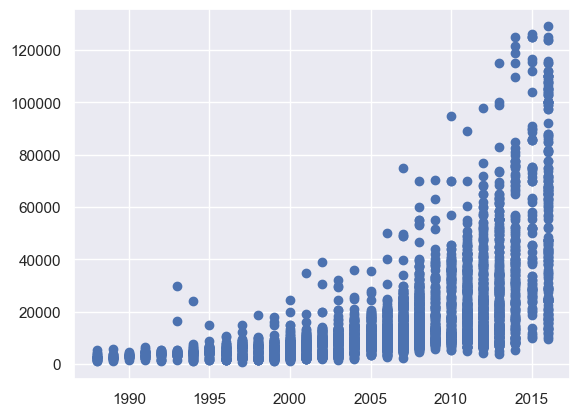

In [260]:
plt.scatter(data_cleaned['Year'],data_cleaned['Price'])

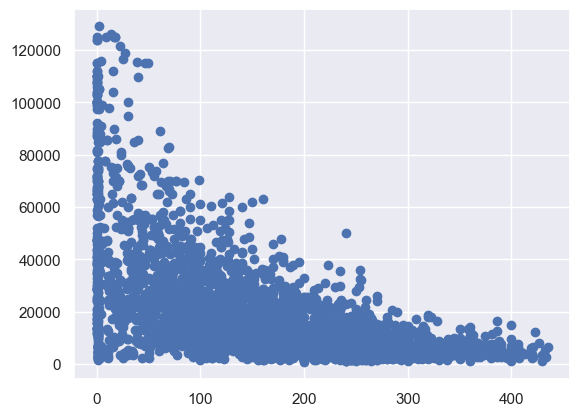

In [261]:
plt.scatter(data_cleaned['Mileage'],data_cleaned['Price'])

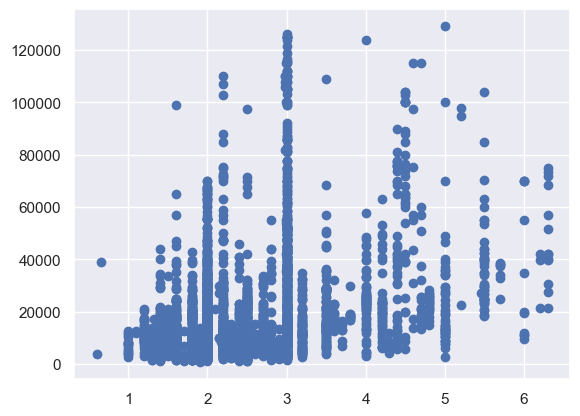

In [262]:
plt.scatter(data_cleaned['EngineV'],data_cleaned['Price'])

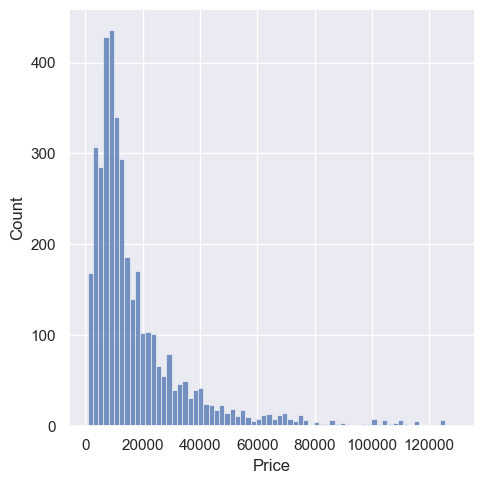

In [263]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.displot(data_cleaned['Price'])

In [264]:
# transforming 'Price' using log transformation
log_price = np.log(data_cleaned['Price'])

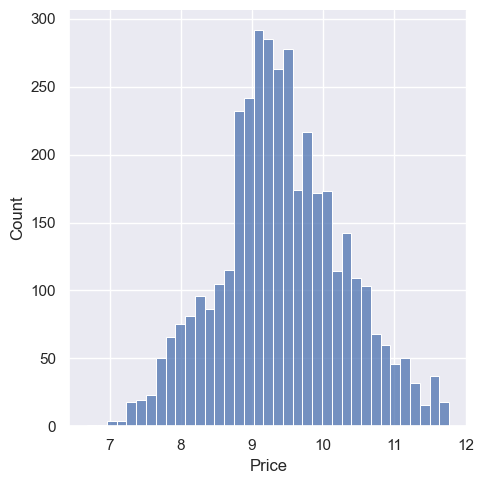

In [265]:
sns.displot(log_price)

In [266]:
data_cleaned['log_price'] = log_price
data_cleaned


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,11.74
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


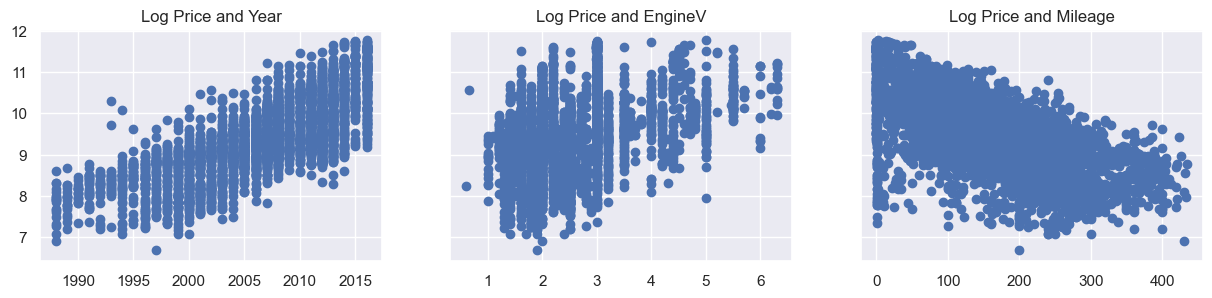

In [267]:
# verifying the relationships are now linear  ==> we now have linearity

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()


In [268]:
# drop the old 'Price' 
data_cleaned = data_cleaned.drop(['Price'],axis=1)

#### Multicollinearity (if 1 variable affects another variable)

In [269]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones

from statsmodels.stats.outliers_influence import variance_inflation_factor
## http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()

# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [270]:
vif

,VIF,Features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


In [271]:
# VIF = 1 =>no multicollinearity
# 1 < VIF < 5 => it's okay
# 5 < VIF => BAD (Drop column )

data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [272]:
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.00,Petrol,yes,8.34
1,Mercedes-Benz,van,427,2.90,Diesel,yes,8.97
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,9.50
3,Audi,crossover,240,4.20,Petrol,yes,10.04
4,Toyota,crossover,120,2.00,Petrol,yes,9.81
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.50,Diesel,yes,9.35
3863,Toyota,sedan,35,1.60,Petrol,yes,9.79
3864,Mercedes-Benz,sedan,9,3.00,Diesel,yes,11.74
3865,BMW,sedan,1,3.50,Petrol,yes,8.78


####  Including Categorical Data (Creating Dummy Variables)  
 Categorical Data :
- **Brand** (Toyota, BMW, Ford, etc.)  
- **Fuel Type** (Petrol, Diesel, Hybrid, Electric)  
- **Engine type** (Gas, Petrol, Other)  

In [273]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity

data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)

In [274]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.90,8.97,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.00,9.50,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.20,10.04,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.00,9.81,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [275]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [276]:
cols = ['log_price','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
# placing the dependent variable first (just for organization)
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head(3)

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.97,427,2.90,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.50,358,5.00,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True


#### Creating the Linear Regression Model  
Once the data is cleaned and prepared, we:  
1. Declare inputs and Targets.  
2. Scale the data.  
3. Split the data into **training and testing sets**.  
4. Train a **Linear Regression model** using Scikit-Learn.
5. Test the model using the test set
6. Evaluate the model 

In [277]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'], axis = 1)

In [278]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler 

# creating the scaler object and fitting the inputs
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [279]:
# Scaling the inputs
inputs_scaled = scaler.transform(inputs)

In [280]:
inputs_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [281]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 420)

In [282]:
# Creating a linear regression object and fitting it with the scaled train inputs and targets
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [283]:
y_hat = reg.predict(x_train)
y_hat

array([ 9.17351674, 10.66483902,  9.1909242 , ...,  9.0250568 ,
        8.95832512, 10.2101347 ])

(6.0, 13.0)

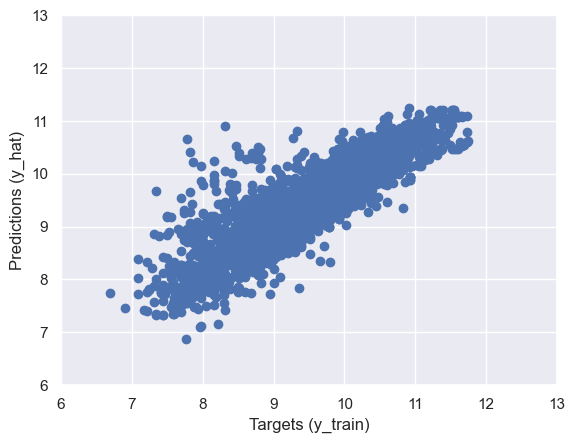

In [284]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction

plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=12)
plt.ylabel('Predictions (y_hat)',size=12)
plt.xlim(6,13)
plt.ylim(6,13)

Text(0.5, 1.0, 'Residuals PDF')

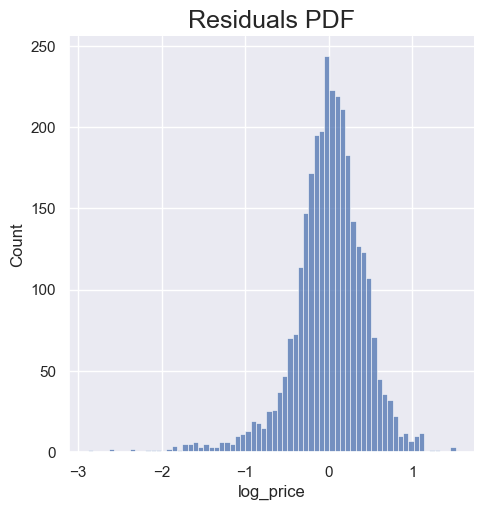

In [285]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18)


In [286]:
# R-squared

reg.score(x_train,y_train)


0.750486854321889

In [287]:
# Intercept (Bias)
reg.intercept_

9.409790769489586

In [288]:
# Coefficients (Weights) 
reg.coef_

array([-0.45532292,  0.20895409,  0.01229666,  0.01134534, -0.14233218,
       -0.1870109 , -0.05808333, -0.09126747, -0.14557454, -0.09902364,
       -0.19614753, -0.12216975, -0.15853703, -0.11975453, -0.02972755,
       -0.14028834,  0.31979581])

In [289]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.46
1,EngineV,0.21
2,Brand_BMW,0.01
3,Brand_Mercedes-Benz,0.01
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.19
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.09
8,Body_hatch,-0.15
9,Body_other,-0.10


#### Testing

Once we have trained and fine-tuned our model, we can proceed to testing it
Testing is done on a dataset that the algorithm has never seen
Luckily we have prepared such a dataset
Our test inputs are 'x_test', while the outputs: 'y_test' 
We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
If the predictions are far off, we will know that our model overfitted

In [290]:
y_hat_test = reg.predict(x_test)

(6.0, 13.0)

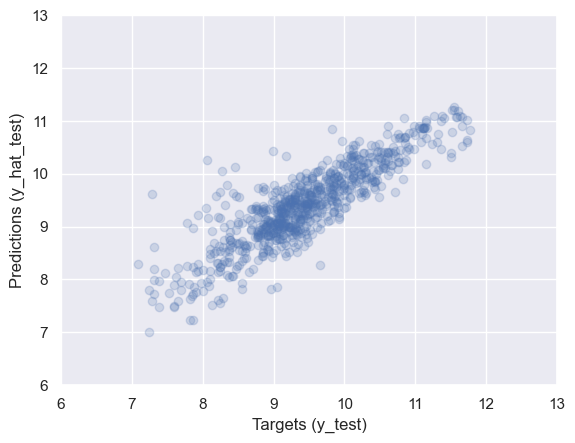

In [291]:
plt.scatter(y_test,y_hat_test , alpha = 0.2)
plt.xlabel('Targets (y_test)',size=12)
plt.ylabel('Predictions (y_hat_test)',size=12)
plt.xlim(6,13)
plt.ylim(6,13)

In [292]:
df_performance = pd.DataFrame(y_hat_test, columns = ['Prediction'])
df_performance.head()

,Prediction
0,9.40
1,9.72
2,9.24
3,9.43
4,8.75


In [293]:
df_performance_exp = pd.DataFrame(np.exp(y_hat_test), columns = ['Prediction'])
df_performance_exp.head()

,Prediction
0,12104.23
1,16677.66
2,10348.79
3,12422.73
4,6286.15


In [294]:
y_test = y_test.reset_index(drop = True)
df_performance_exp['Target'] = np.exp(y_test)

In [299]:
df_performance_exp.head()

,Prediction,Target,Residual,Difference%
0,12104.23,11700.00,-404.23,3.45
1,16677.66,6500.00,-10177.66,156.58
2,10348.79,9300.00,-1048.79,11.28
3,12422.73,10200.00,-2222.73,21.79
4,6286.15,4400.00,-1886.15,42.87


In [300]:
df_performance_exp['Residual'] = df_performance_exp['Target'] - df_performance_exp['Prediction']
df_performance_exp['Difference%'] = np.absolute(df_performance_exp['Residual']/df_performance_exp['Target']*100)
df_performance_exp.head()

,Prediction,Target,Residual,Difference%
0,12104.23,11700.00,-404.23,3.45
1,16677.66,6500.00,-10177.66,156.58
2,10348.79,9300.00,-1048.79,11.28
3,12422.73,10200.00,-2222.73,21.79
4,6286.15,4400.00,-1886.15,42.87


In [297]:
df_performance_exp.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,16164.63,18847.29,2682.66,36.79
std,13046.23,20516.06,11232.29,62.53
min,1105.10,1200.00,-33210.56,0.06
25%,7669.55,7500.00,-1910.97,11.83
50%,12131.80,11725.00,550.80,24.17
75%,20309.15,21986.75,4251.10,42.27
max,78301.10,129222.00,85006.76,936.67


In [298]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_performance_exp.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
357,3802.21,3800.00,-2.21,0.06
154,3792.97,3800.00,7.03,0.18
348,8682.41,8700.00,17.59,0.20
302,24835.73,24900.00,64.27,0.26
342,10467.47,10500.00,32.53,0.31
63,8024.80,8000.00,-24.80,0.31
221,8965.94,9000.00,34.06,0.38
48,24604.10,24500.00,-104.10,0.42
197,7335.33,7300.00,-35.33,0.48
53,46772.03,47000.00,227.97,0.49
